### Develop a document clustering system.
First, collect a number of documents that belong to different categories, namely Sport, Health 
and Business. Each document should be at least one sentence (the longer is usually the better). 
The total number of documents is up to you but should be at least 100 (the more is usually the 
better). You may collect these document from publicly available web sites such as BBC news 
websites, but make sure you preserve their copyrights and terms of use and clearly cite them in 
your work. You may simply copy-paste such texts manually, and writing an RSS feed 
reader/crawler to do it automatically is NOT mandatory.
Once you have collected sufficient documents, cluster them using a standard clustering method 
(e.g. K-means).

Finally, use the created model to assign a new document to one of the existing clusters. That is, 
the user enters a document (e.g. a sentence) and your system outputs the right cluster.
NOTE: You must show in your report and viva that your system suggests the right cluster for variety 
of inputs, e.g. short and long inputs, those with and without stop worlds, inputs of different topics, 
as well as more challenging inputs to show the system is robust enough.

## Importing the necessary Library components:

In [33]:
import os
import string

# Data Handling and Processing
import pandas as pd
import numpy as np
import re
from scipy import interp


# Visualuzation
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# NLP Packages
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk
from joblib import dump, load
lemmatizer = WordNetLemmatizer()




# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier

# Scikit Learn packages
from sklearn.base import clone
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold, cross_validate, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


import requests
from bs4 import  BeautifulSoup
import csv
import pandas as pd
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import ast




## load datasets

In [4]:
df = pd.read_csv("news_dataset.csv")
df

,Text,Category
0,Giggs admits he was wavering and considering j...,sport
1,The 25-year-old tested positive for a banned s...,sport
2,Rico Gear ran in two of the All Blacks' seven ...,sport
3,Jorge Andrade's early own goal gave Liverpool ...,sport
4,Rangers had rarely threatened until Celtic goa...,sport
...,...,...
295,Nigeria: Zipline Signs MoU with Kaduna to Tran...,health
296,Nigeria: NAFDAC Puts Fake Medicine in Circulat...,health
297,Covid: Several Countries Reintroduce Restricti...,health
298,More ‘Pain and Suffering’ Ahead as Covid Cases...,health


## Dataset Exploration

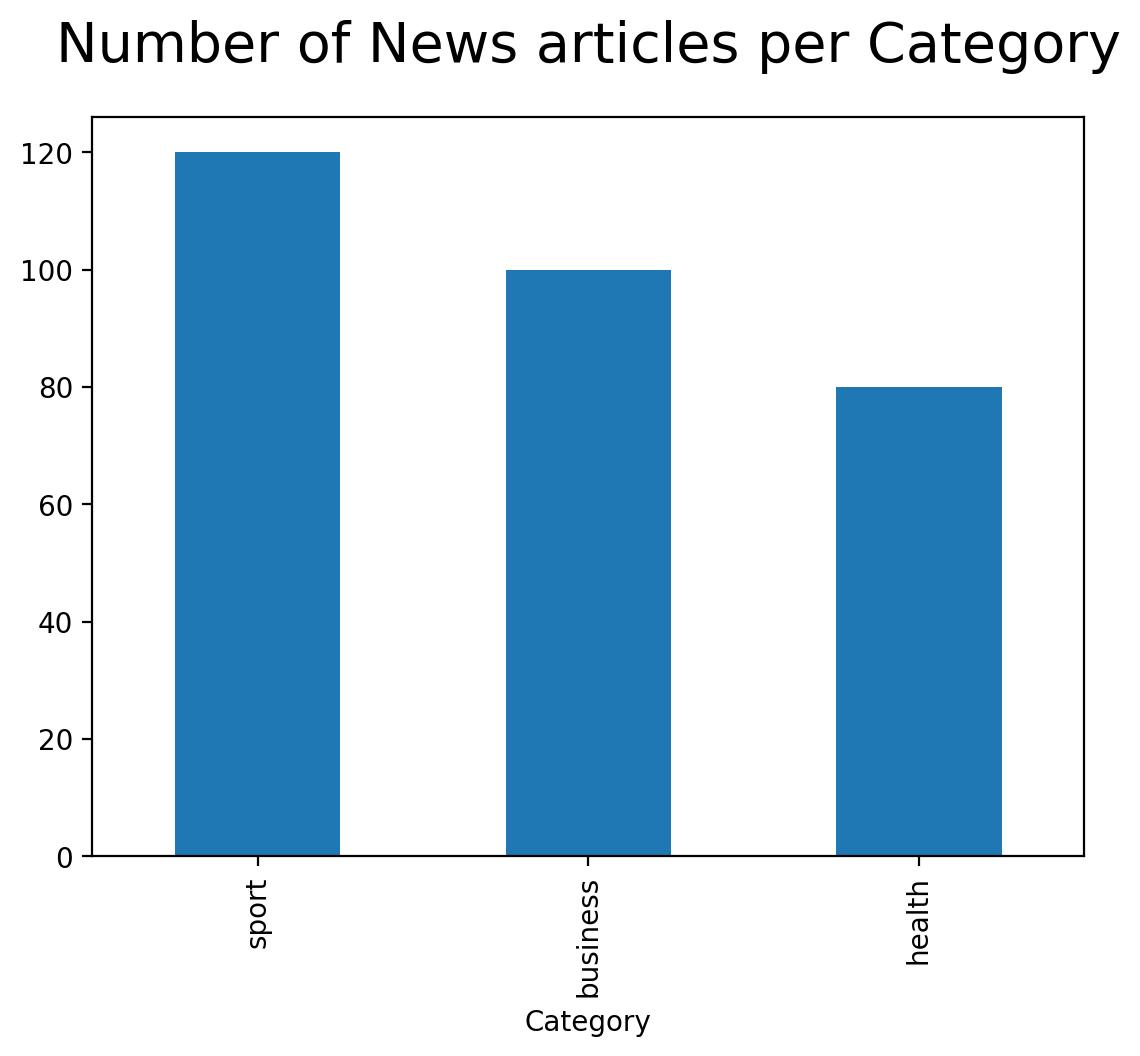

In [5]:
df['Category'].value_counts().plot(kind='bar')
plt.title('Number of News articles per Category', size=20, pad=20);

In [6]:
df.isnull().sum()

Text        0
Category    0
dtype: int64

## Data pre-processing

In [7]:
def preprocess(df):
    
    ## remove stopwords
    def remove_stop_words(x,stop_word):
        return " ".join([i for i in x.split() if i not in stop_word])
    df['filtered_Text'] = df['Text'].apply(lambda x: remove_stop_words(x, stop_words))
    # Remove special characters and make text lowercase
    df['filtered_Text'] = df['filtered_Text'].str.replace(r'\W', ' ', regex=True)
    df['filtered_Text'] = df['filtered_Text'].str.replace(r'\d+', '',regex=True)
    df['filtered_Text'] = df['filtered_Text'].str.replace('.',' ',regex=False)
    df['filtered_Text'] = df['filtered_Text'].str.rsplit('_', n=1).str.get(0)
    df['filtered_Text']=df['filtered_Text'].str.strip()
    df['filtered_Text'] = df['filtered_Text'].str.lower()
    
    def fwpt(each):
        tag = pos_tag([each])[0][1][0].upper()
        hash_tag = {"N": wordnet.NOUN,"R": wordnet.ADV, "V": wordnet.VERB,"J": wordnet.ADJ}        
        return hash_tag.get(tag, wordnet.NOUN)

    
    def lematize(text):
        tokens = nltk.word_tokenize(text)
        ax = ""
        for each in tokens:
            if each not in stop_words:
                ax += lemmatizer.lemmatize(each, fwpt(each)) + " "
        return ax
    
    df['filtered_Text'] = df['filtered_Text'].apply(lematize)

In [8]:
preprocess(df)

In [9]:
df.iloc[1]['Text']

'The 25-year-old tested positive for a banned substance - which he later denied was cocaine - in October. Chelsea have decided to write off a possible transfer fee for Mutu, a £15.8m signing from Parma last season, who may face a two-year suspension. A statement from Chelsea explaining the decision read:"We want to make clear that Chelsea has a zero tolerance policy towards drugs." Mutu scored six goals in his first five games after arriving at Stamford Bridge but his form went into decline and he was frozen out by coach Jose Mourinho. Chelsea\'s statement added: "This applies to both performance-enhancing drugs or so-called \'recreational\' drugs. They have no place at our club or in sport. "In coming to a decision on this case, Chelsea believed the club\'s social responsibility to its fans, players, employees and other stakeholders in football regarding drugs was more important than the major financial considerations to the company. "Any player who takes drugs breaches his contract w

In [13]:
# Combine relevant columns into a text feature for clustering
text_feature = df['filtered_Text']   # You can customize this based on your features

# Use TfidfVectorizer to convert text data into a numerical format, removing stopwords
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_feature)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters as needed
df['cluster'] = kmeans.fit_predict(X)

# Display the DataFrame with cluster assignments
print("DataFrame with cluster assignments:")
print(df)

C:\Users\basan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DataFrame with cluster assignments:
                                                  Text Category  \
0    Giggs admits he was wavering and considering j...    sport   
1    The 25-year-old tested positive for a banned s...    sport   
2    Rico Gear ran in two of the All Blacks' seven ...    sport   
3    Jorge Andrade's early own goal gave Liverpool ...    sport   
4    Rangers had rarely threatened until Celtic goa...    sport   
..                                                 ...      ...   
295  Nigeria: Zipline Signs MoU with Kaduna to Tran...   health   
296  Nigeria: NAFDAC Puts Fake Medicine in Circulat...   health   
297  Covid: Several Countries Reintroduce Restricti...   health   
298  More ‘Pain and Suffering’ Ahead as Covid Cases...   health   
299  Algerian President Returns to Germany to Be Tr...   health   

                                         filtered_Text  cluster  
0    giggs admits waver consider join like former w...        1  
1    year old test positive

In [14]:
df['cluster'].value_counts()

cluster
2    141
1    111
0     48
Name: count, dtype: int64

In [15]:
for cluster_num in range(df['cluster'].nunique()):
    cluster_description = df[df['cluster'] == cluster_num]['filtered_Text']

    print(f'\nCluster {cluster_num} filtered_Text:')
    print(cluster_description.values)



Cluster 0 filtered_Text:
['european union eu official strongly recommend member state require negative covid test chinese arrival travel travel china set become easy due scrap zero covid policy china currently experience surge covid case lead overwhelmed hospital crematorium eu country already implement test requirement despite earlier advice suggest unjustified eu integrate political crisis response group ipcr comprise official eu government recommend several measure include wear face mask passenger flight china introduction random test flight china conduct wastewater monitoring airport european commission state majority member state favor restriction chinese arrival lead france spain italy already implement test requirement germany monitoring situation england outside eu mandate pre flight test arrival china start thursday unclear whether eu wide policy introduce individual state determine policy ipcr recommendation represent change direction advice give european centre disease prev

In [23]:
# Create a mapping for cluster names
cluster_names_mapping = {0: 'health', 1: 'business', 2: 'Sport'}

# Map cluster numbers to names
df['cluster_name'] = df['cluster'].map(cluster_names_mapping)

# Display the DataFrame with cluster names
print("DataFrame with Cluster Names:")
print(df[['filtered_Text', 'cluster_name']])


DataFrame with Cluster Names:
                                         filtered_Text cluster_name
0    giggs admits waver consider join like former w...     business
1    year old test positive ban substance later den...     business
2    rico gear ran two black seven try predominantl...     business
3    jorge andrade early goal give liverpool win be...     business
4    ranger rarely threaten celtic goalkeeper rab d...     business
..                                                 ...          ...
295  nigeria zipline sign mou kaduna transport vacc...       health
296  nigeria nafdac put fake medicine circulation p...       health
297  covid several country reintroduce restriction ...       health
298       pain suffer ahead covid case rise fauci say        health
299  algerian president return germany treat covid ...       health

[300 rows x 2 columns]


In [24]:
from sklearn.metrics import accuracy_score

# Display the DataFrame with cluster names
print("DataFrame with Cluster Names:")
print(df[['filtered_Text', 'cluster_name', 'Category']])

# Calculate accuracy
accuracy = accuracy_score(df['Category'], df['cluster_name'])

print("Accuracy:", accuracy)

DataFrame with Cluster Names:
                                         filtered_Text cluster_name Category
0    giggs admits waver consider join like former w...     business    sport
1    year old test positive ban substance later den...     business    sport
2    rico gear ran two black seven try predominantl...     business    sport
3    jorge andrade early goal give liverpool win be...     business    sport
4    ranger rarely threaten celtic goalkeeper rab d...     business    sport
..                                                 ...          ...      ...
295  nigeria zipline sign mou kaduna transport vacc...       health   health
296  nigeria nafdac put fake medicine circulation p...       health   health
297  covid several country reintroduce restriction ...       health   health
298       pain suffer ahead covid case rise fauci say        health   health
299  algerian president return germany treat covid ...       health   health

[300 rows x 3 columns]
Accuracy: 0.16


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [26]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
tfidf_matrix = vectorizer.fit_transform(df['filtered_Text'])

In [27]:
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [28]:
def predict_cluster_and_category(input_text):
    input_vector = vectorizer.transform([input_text])
    cluster = kmeans.predict(input_vector)[0]
    category = final_df.iloc[cluster]['category']
    return cluster, category

In [29]:
df['filtered_Text']

0      giggs admits waver consider join like former w...
1      year old test positive ban substance later den...
2      rico gear ran two black seven try predominantl...
3      jorge andrade early goal give liverpool win be...
4      ranger rarely threaten celtic goalkeeper rab d...
                             ...                        
295    nigeria zipline sign mou kaduna transport vacc...
296    nigeria nafdac put fake medicine circulation p...
297    covid several country reintroduce restriction ...
298         pain suffer ahead covid case rise fauci say 
299    algerian president return germany treat covid ...
Name: filtered_Text, Length: 300, dtype: object

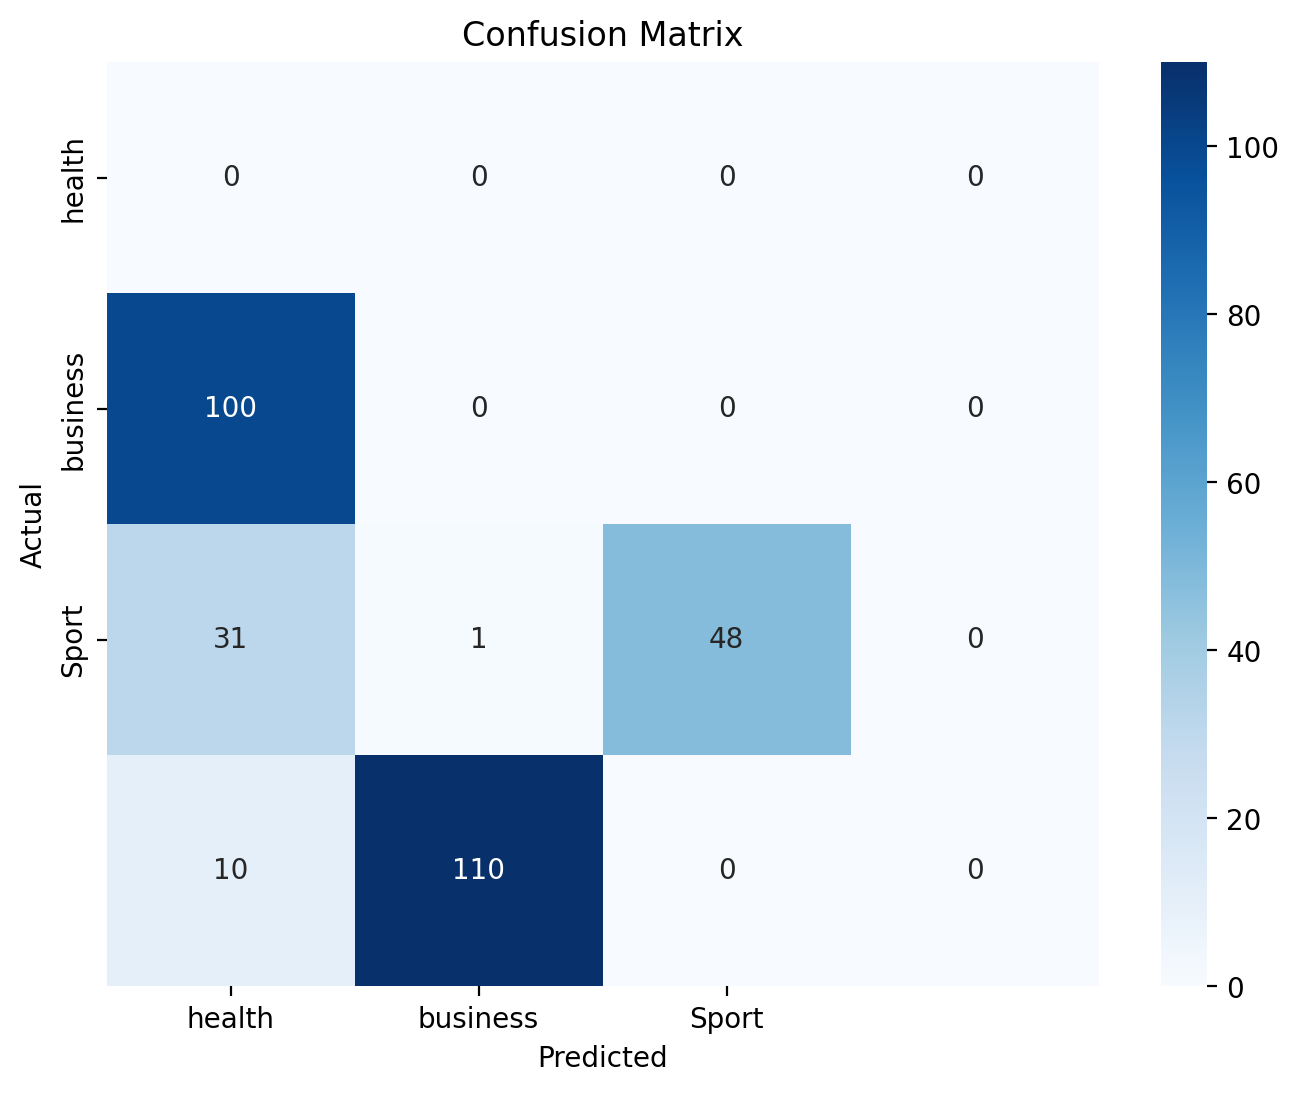

In [44]:

# Create confusion matrix
conf_matrix = confusion_matrix(df['Category'], df['cluster_name'])
 
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cluster_names_mapping.values(), yticklabels=cluster_names_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()